# Parkinsons disease :

In [1]:
import pandas as pd

Importing the dataset:

In [2]:
a=pd.read_csv('parkinsson.csv')

In [3]:
a.head()
a.shape

(195, 24)

In [4]:
a.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [5]:
a.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
import seaborn as sns


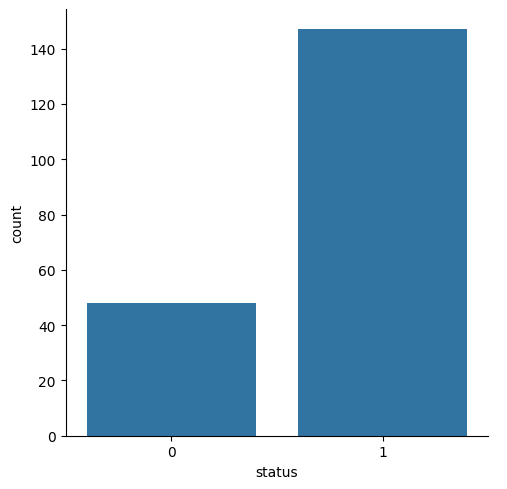

In [7]:
sns.catplot(x='status',kind='count',data=a)

c:\Users\DELL\Desktop\major-project\.venv\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


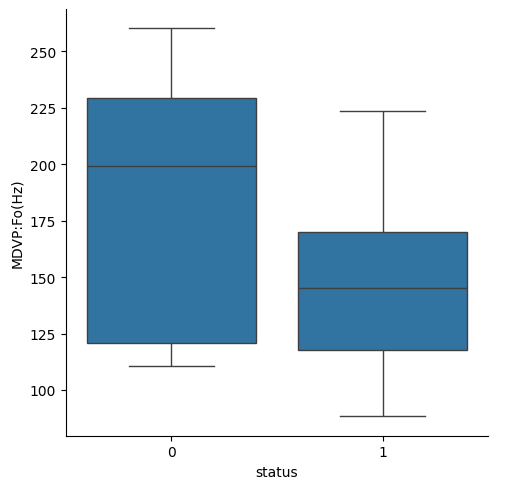

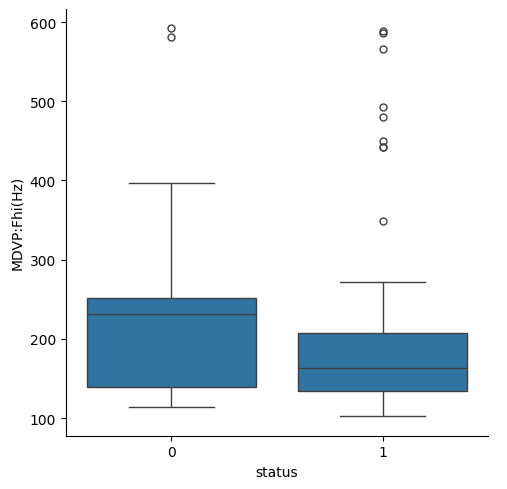

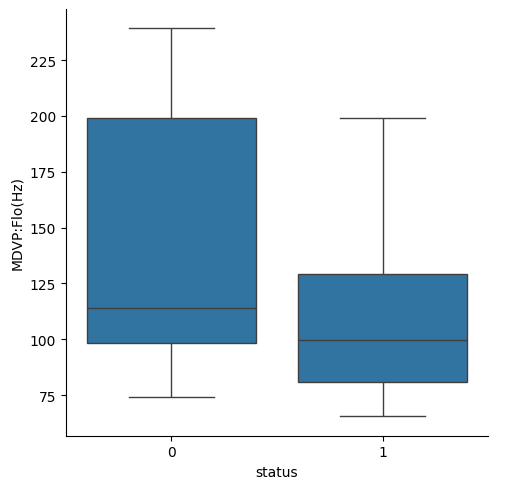

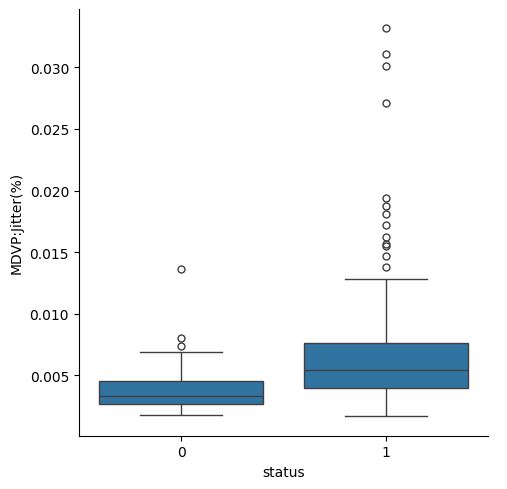

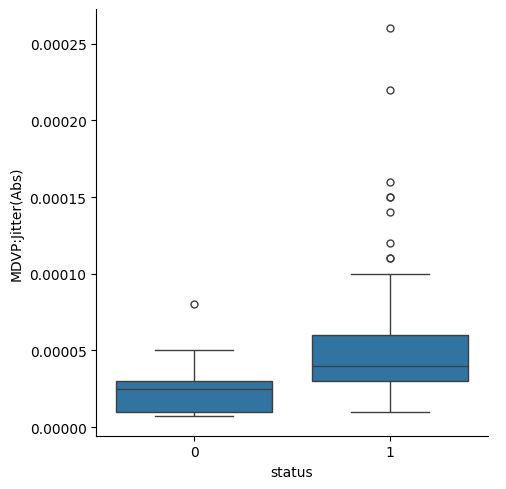

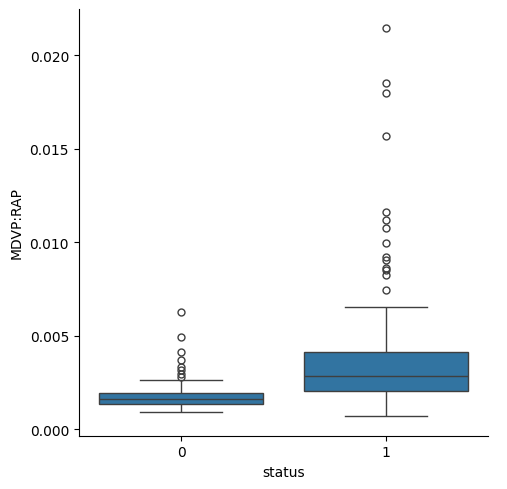

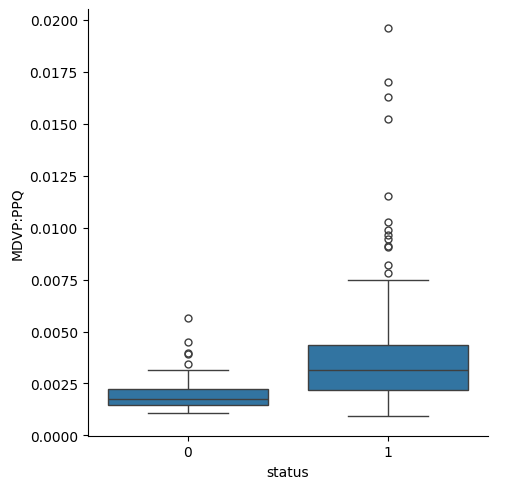

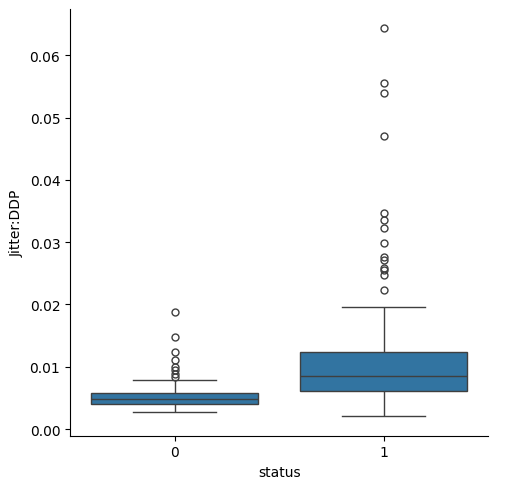

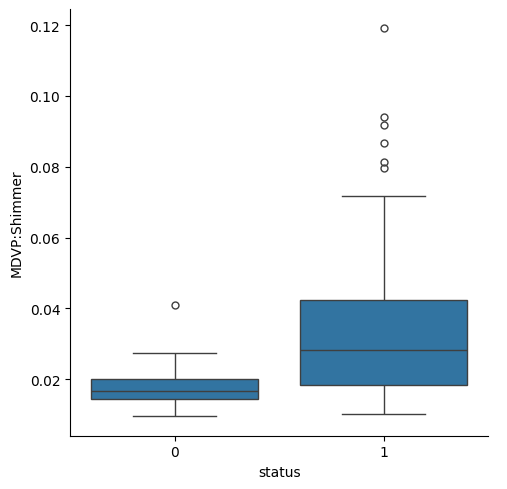

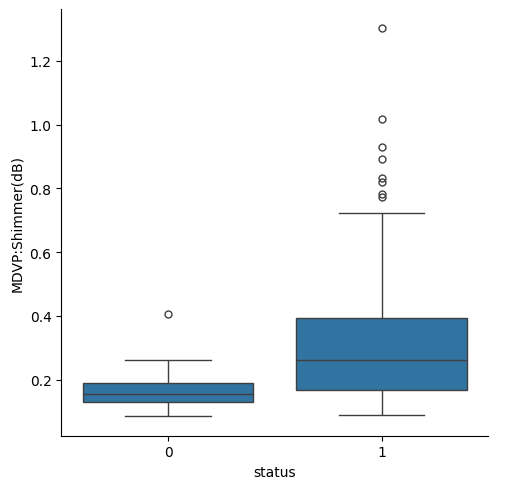

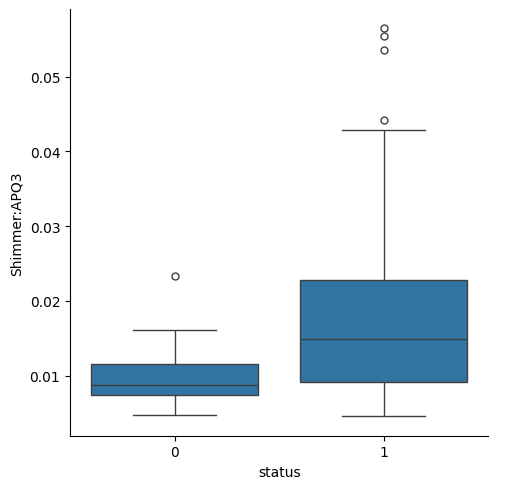

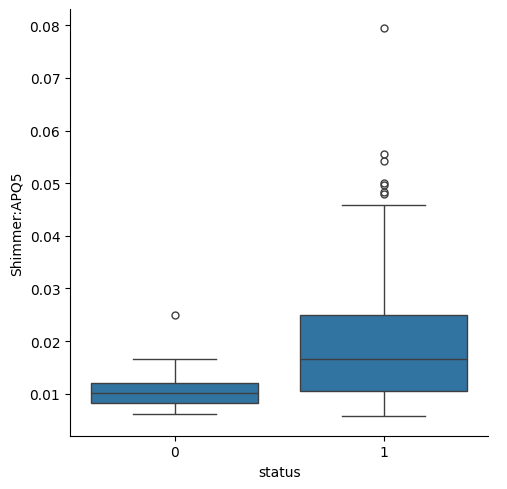

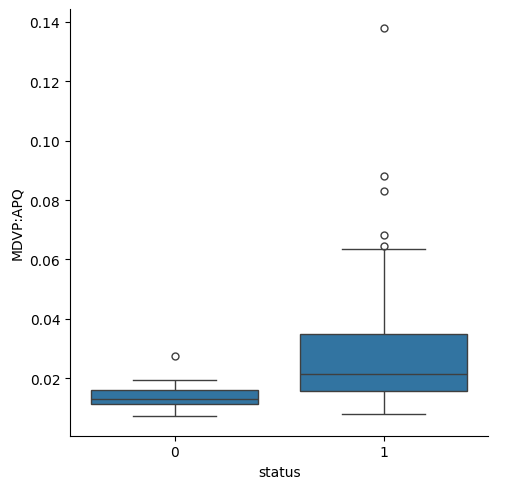

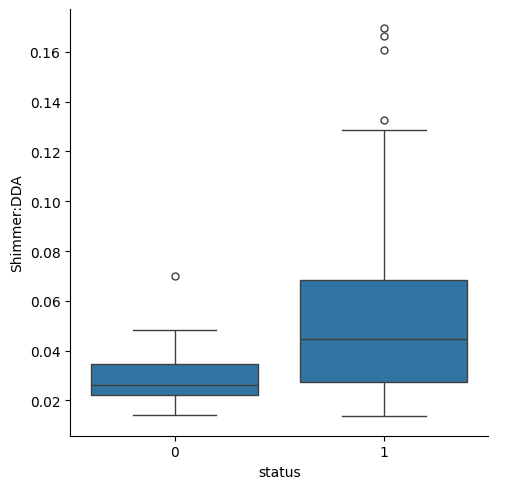

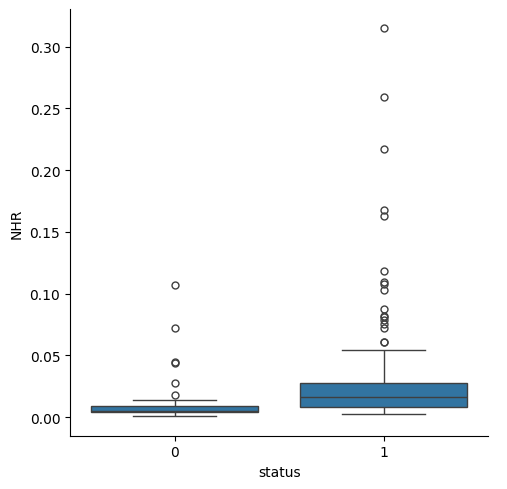

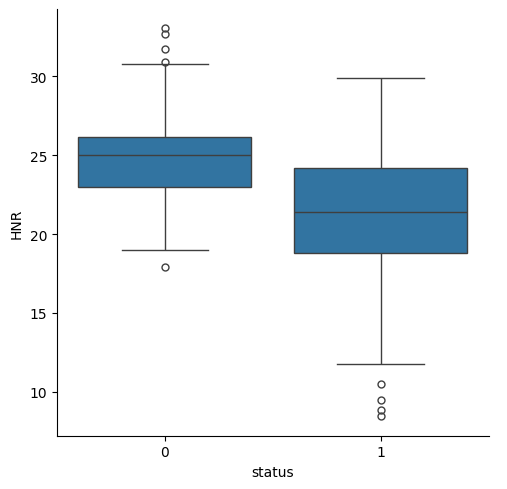

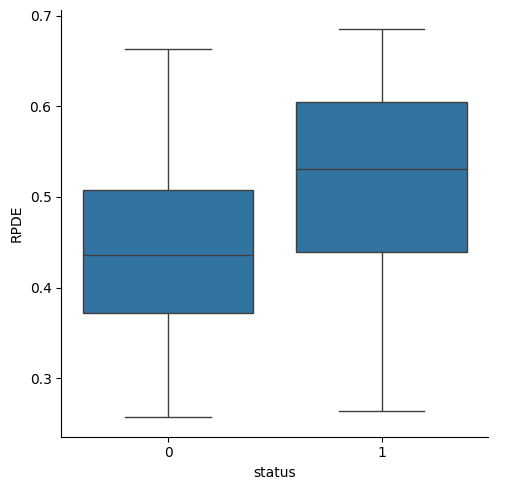

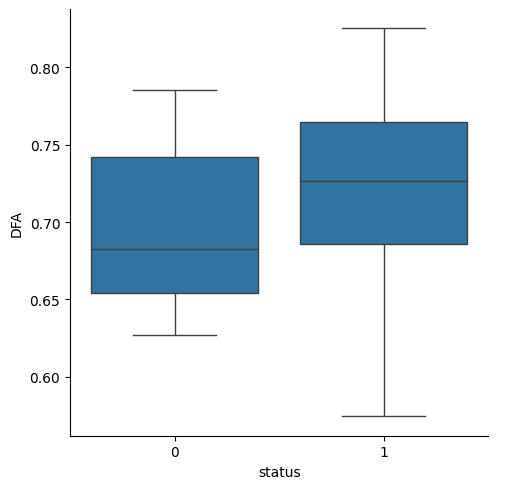

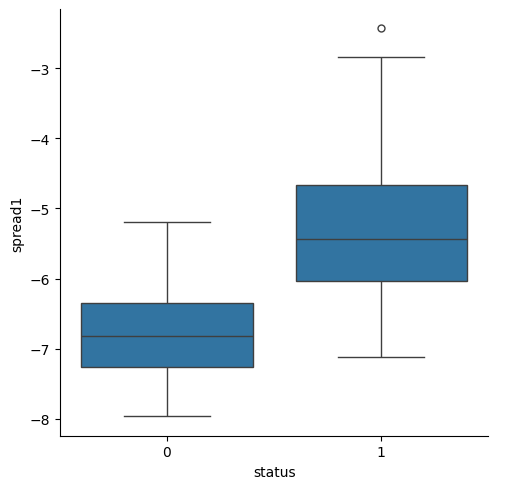

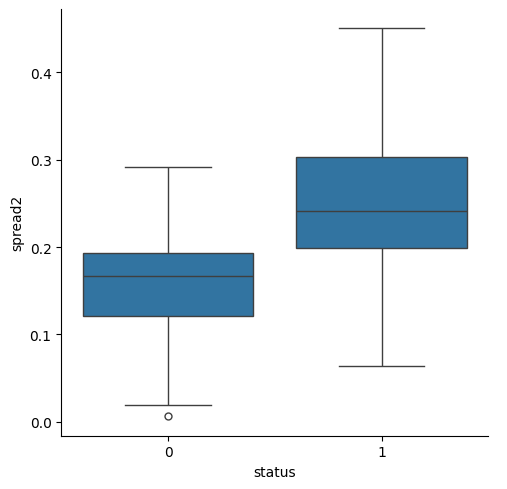

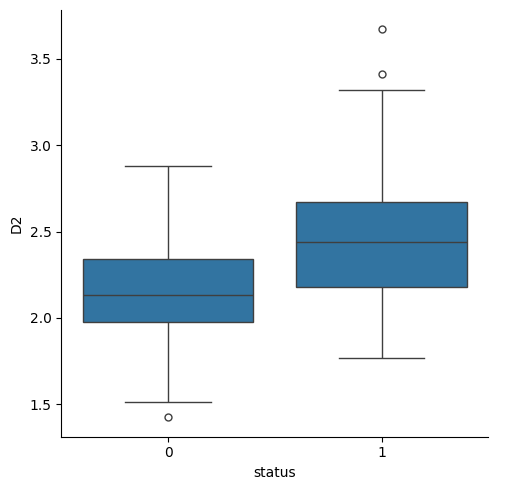

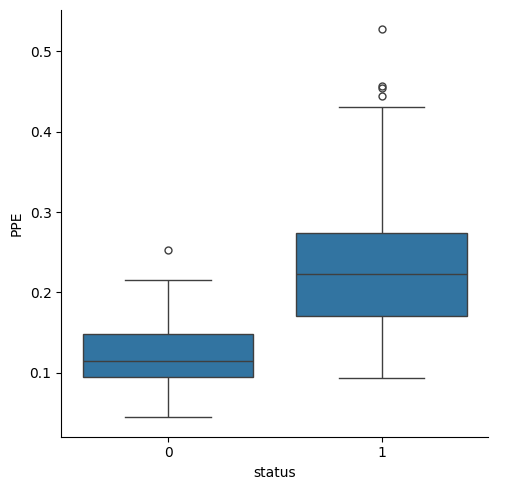

In [8]:
for i in a:
    if i != 'status' and i != 'name':
        sns.catplot(x='status',y=i,kind='box',data=a)

In [9]:
b=a.drop(['name'],axis=1)

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error

In [11]:
features=a.drop(['status','name'],axis=1)
labels=a['status']

In [12]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [13]:

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=5)

In [14]:
#cross validation:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier


In [15]:
lr=cross_val_score(LogisticRegression(),x_train,y_train)
xgbc=cross_val_score(XGBRFClassifier(),x_train,y_train)
xgb=cross_val_score(XGBClassifier(),x_train,y_train)
svm=cross_val_score(SVC(),x_train,y_train)
#nb=cross_val_score(MultinomialNB(),x_train,y_train)
dtc=cross_val_score(DecisionTreeClassifier(),x_train,y_train)
adb=cross_val_score(AdaBoostClassifier(),x_train,y_train)
bbc=cross_val_score(BaggingClassifier(),x_train,y_train)
etc=cross_val_score(ExtraTreesClassifier(),x_train,y_train)
gbc=cross_val_score(GradientBoostingClassifier(),x_train,y_train)
rfc=cross_val_score(RandomForestClassifier(),x_train,y_train)
#vc=cross_val_score(VotingClassifier(estimators),x_train,y_train)

In [16]:
print('log reg',lr,lr.mean())
print('xgbd',xgbc,xgbc.mean())
print('xgb',xgb,xgb.mean())
print('svm',svm,svm.mean())
#print('nb',nb,nb.mean)
print('dtc',dtc,dtc.mean())
print('adb',adb,adb.mean())
print('bbc',bbc,bbc.mean())
print('etc',etc,etc.mean())
print('gbc',gbc,gbc.mean())
print('rfc',rfc,rfc.mean())
#print('vc',vc,vc.mean)

log reg [0.90625    0.90322581 0.87096774 0.83870968 0.80645161] 0.8651209677419356
xgbd [0.90625    0.93548387 0.87096774 0.96774194 0.80645161] 0.8973790322580646
xgb [0.875      0.93548387 0.83870968 0.96774194 0.87096774] 0.8975806451612904
svm [0.90625    0.90322581 0.87096774 0.87096774 0.87096774] 0.884475806451613
dtc [0.84375    0.87096774 0.83870968 0.90322581 0.93548387] 0.8784274193548388
adb [0.90625    0.87096774 0.87096774 0.96774194 0.87096774] 0.8973790322580646
bbc [0.90625    0.90322581 0.87096774 0.96774194 0.87096774] 0.9038306451612904
etc [0.90625    0.96774194 0.87096774 0.90322581 0.87096774] 0.9038306451612904
gbc [0.90625    0.90322581 0.90322581 0.96774194 0.90322581] 0.916733870967742
rfc [0.90625    0.96774194 0.93548387 0.90322581 0.87096774] 0.916733870967742


# XGboost:

First a model is fit using the xgboost algorithm(no parameter tuning is done).

In [17]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [18]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

100.0


In [ ]:

y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

89.74358974358975


# Extra trees classifier:

In [20]:
model=ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier()

In [ ]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

89.74358974358975


In [22]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

100.0


In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.90      0.97      0.93        29

    accuracy                           0.90        39
   macro avg       0.89      0.83      0.86        39
weighted avg       0.90      0.90      0.89        39

[[ 7  3]
 [ 1 28]]


In [24]:
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,1
1,0
2,0
3,1
4,0
5,1
6,1
7,1
8,1
9,0


In [25]:
# model import

import pickle
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x_train, y_train)  # Replace with your data

with open('parkinsons.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('parkinsons.pkl', 'rb') as file:
    loaded_model = pickle.load(file)